In [0]:
spark


SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql import SparkSession

# create Session 
spark = SparkSession.builder.appName("IPL_DATA_ANALYSIS").getOrCreate()

In [0]:
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType
from pyspark.sql.functions import col, when , sum, avg, row_number
from pyspark.sql.window import Window 

In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])


In [0]:
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").option("inferSchema", "true").load("s3://ipl-data-analysis-project/Ball_By_Ball.csv")

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])

match_df = spark.read.schema(match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Match.csv")


In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

player_df = spark.read.schema(player_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Player.csv")


In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Player_match.csv")


In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Team.csv")
     

In [0]:
#fileter to include only valid deliveries (excluding extras like wides and no balls for specific analysis )
ball_by_ball_df = ball_by_ball_df.filter((col("wides") == 0) & (col("noballs")==0))

# aggregation: Calculate the total and average runs scored in each match and inning 
total_and_avg_runs = ball_by_ball_df.groupBy("match_id", "innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("average_runs")
)


In [0]:
# indow function: Calculate running total of runs in each match for each over 
windowSpec = Window.partitionBy("match_id", "innings_no").orderBy("over_id")

ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs", 
    sum("runs_scored").over(windowSpec)
)

In [0]:
# conditional Column : Falg for high impact balls ( either a wicket or more than 6 runs including extras)
ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact", 
    when((col("runs_scored") + col("extra_runs") > 6) | (col("bowler_wicket") == True), True).otherwise(False)
         
)

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [0]:
from pyspark.sql.functions import year, month, dayofmonth, when

# Extracting year, month, and day from the match date for more detailed time-based analysis
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))

# High margin win: categorizing win margins into 'high', 'medium', and 'low'
match_df = match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
)

# Analyze the impact of the toss: who wins the toss and the match
match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

# Show the enhanced match DataFrame
match_df.show(2)


+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       I

In [0]:
from pyspark.sql.functions import lower, regexp_replace

# Normalize and clean player names
player_df = player_df.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]", "")))

# Handle missing values in 'batting_hand' and 'bowling_skill' with a default 'unknown'
player_df = player_df.na.fill({"batting_hand": "unknown", "bowling_skill": "unknown"})

# Categorizing players based on batting hand
player_df = player_df.withColumn(
    "batting_style",
    when(col("batting_hand").contains("left"), "Left-Handed").otherwise("Right-Handed")
)

# Show the modified player DataFrame
player_df.show(2)
     

+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|player_sk|player_id|player_name| dob|  batting_hand|   bowling_skill|country_name|batting_style|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|        0|        1| sc ganguly|null| Left-hand bat|Right-arm medium|       India| Right-Handed|
|        1|        2|bb mccullum|null|Right-hand bat|Right-arm medium| New Zealand| Right-Handed|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
only showing top 2 rows



In [0]:
from pyspark.sql.functions import col, when, current_date, expr

# Add a 'veteran_status' column based on player age
player_match_df = player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match") >= 35, "Veteran").otherwise("Non-Veteran")
)

# Dynamic column to calculate years since debut
player_match_df = player_match_df.withColumn(
    "years_since_debut",
    (year(current_date()) - col("season_year"))
)

# Show the enriched DataFrame
player_match_df.show()


+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------

In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [0]:
top_scoring_batsmen_per_season = spark.sql(""" 
    SELECT 
    p.player_name, 
    m.season_year, 
    SUM(b.runs_scored) AS total_runs 
    FROM ball_by_ball b
    JOIN match m ON b.match_id = m.match_id
    JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id  
    JOIN player p ON p.player_id = pm.player_id
    GROUP BY p.player_name, m.season_year
    ORDER BY m.season_year, total_runs DESC
""")

In [0]:
top_scoring_batsmen_per_season.show()

+-------------+-----------+----------+
|  player_name|season_year|total_runs|
+-------------+-----------+----------+
|     se marsh|       2008|       614|
|    g gambhir|       2008|       532|
|st jayasuriya|       2008|       508|
|    sr watson|       2008|       463|
|     gc smith|       2008|       437|
| ac gilchrist|       2008|       431|
|    yk pathan|       2008|       430|
|     sk raina|       2008|       420|
|     ms dhoni|       2008|       414|
|     v sehwag|       2008|       399|
|    rg sharma|       2008|       399|
|     r dravid|       2008|       370|
|   sc ganguly|       2008|       349|
|     s dhawan|       2008|       340|
|kc sangakkara|       2008|       319|
|    dj hussey|       2008|       318|
|   rv uthappa|       2008|       316|
|  sa asnodkar|       2008|       311|
| yuvraj singh|       2008|       299|
|     pa patel|       2008|       297|
+-------------+-----------+----------+
only showing top 20 rows



In [0]:
economical_bowlers_powerplay = spark.sql("""
    SELECT p.player_name, round(avg(b.runs_scored),2) AS avg_runs_per_ball, count(b.bowler_wicket) AS total_wickets
    FROM ball_by_ball b 
    JOIN player_match as pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
    JOIN player p ON pm.player_id = p.player_id 
    where b.over_id <= 6
    GROUP BY p.player_name
    HAVING count(*) >= 10
    ORDER BY avg_runs_per_ball, total_wickets DESC
""")

economical_bowlers_powerplay.show()

+-----------------+-----------------+-------------+
|      player_name|avg_runs_per_ball|total_wickets|
+-----------------+-----------------+-------------+
|       sm harwood|             0.33|            0|
|       avesh khan|              0.5|            0|
|         nb singh|             0.58|            0|
|       ag murtaza|             0.65|            0|
|        sb bangar|             0.67|            0|
|       d du preez|             0.67|            0|
|       fh edwards|             0.69|            0|
|         a kumble|             0.77|            0|
|     kp pietersen|             0.78|            0|
|         umar gul|             0.78|            0|
|  j syed mohammad|             0.78|            0|
|      rj peterson|             0.83|            0|
|  smsm senanayake|             0.85|            0|
|        a symonds|             0.89|            0|
|       t thushara|              0.9|            0|
|mustafizur rahman|             0.92|            0|
|  c de gran

In [0]:
toss_match_impact_on_game = spark.sql("""
    SELECT m.match_id, m.toss_winner, m.toss_name, m.toss_winner,
            CASE WHEN m.toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome
    FROM match m
    WHERE m.toss_name is NOT NULL
    ORDER BY m.match_id                                 
""")

toss_match_impact_on_game.show()

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|         toss_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Royal Challengers...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Rajasthan Royals|         Lost|
|  335990|      Mumbai Indians|      bat|      Mumbai Indians|         Lost|
|  335991|     Deccan Chargers|      bat|     Deccan Chargers|         Lost|
|  335992|     Kings XI Punjab|      bat|     Kings XI Punjab|         Lost|
|  335993|     Deccan Chargers|      bat|     Deccan Chargers|         Lost|
|  335994|      Mumbai Indians|    field|      Mumbai Indians|         Lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          Won|
|  335996|      Mumbai Indians|    field|      Mumbai Indians|         Lost|

In [0]:
# without season year 
toss_win_and_match_win = spark.sql("""
  WITH TossWinMatchWin AS (
    SELECT
        m.match_id,
        m.toss_winner AS team_name,
        m.match_winner AS winning_team
    FROM
        Match m
    WHERE
        m.toss_winner = m.match_winner
),
TossWins AS (
    SELECT
        m.toss_winner AS team_name,
        COUNT(m.match_id) AS total_toss_wins
    FROM
        Match m
    GROUP BY
        m.toss_winner
),
MatchWinsAfterTossWin AS (
    SELECT
        tw.team_name,
        COUNT(tw.match_id) AS total_wins_after_toss_win
    FROM
        TossWinMatchWin tw
    GROUP BY
        tw.team_name
)
SELECT
    t.team_id,
    t.team_name,
    ROUND((mw.total_wins_after_toss_win / tw.total_toss_wins) * 100, 2) AS toss_win_percentage
FROM
    Team t
JOIN
    TossWins tw ON t.team_name = tw.team_name
JOIN
    MatchWinsAfterTossWin mw ON t.team_name = mw.team_name
ORDER BY
    toss_win_percentage ASC
""")

toss_win_and_match_win.show()

+-------+--------------------+-------------------+
|team_id|           team_name|toss_win_percentage|
+-------+--------------------+-------------------+
|     10|       Pune Warriors|               15.0|
|      4|     Kings XI Punjab|              41.18|
|      8|     Deccan Chargers|              44.19|
|      6|    Delhi Daredevils|              45.83|
|     11| Sunrisers Hyderabad|              48.57|
|      9|Kochi Tuskers Kerala|               50.0|
|      2|Royal Challengers...|               50.0|
|      5|    Rajasthan Royals|              53.97|
|      1|Kolkata Knight Ri...|              56.41|
|      7|      Mumbai Indians|              56.47|
|     12|Rising Pune Super...|              58.33|
|      3| Chennai Super Kings|              63.64|
|     13|       Gujarat Lions|              66.67|
+-------+--------------------+-------------------+



In [0]:
# with season year 
toss_win_and_match_win_with_season_year = spark.sql("""
WITH TossWinMatchWin AS (
    SELECT
        m.match_id,
        m.toss_winner AS team_name,
        m.match_winner AS winning_team,
        m.season_year
    FROM
        Match m
    WHERE
        m.toss_winner = m.match_winner
),
TossWins AS (
    SELECT
        m.toss_winner AS team_name,
        COUNT(m.match_id) AS total_toss_wins,
        m.season_year
    FROM
        Match m
    GROUP BY
        m.toss_winner, m.season_year
),
MatchWinsAfterTossWin AS (
    SELECT
        tw.team_name,
        COUNT(tw.match_id) AS total_wins_after_toss_win,
        tw.season_year
    FROM
        TossWinMatchWin tw
    GROUP BY
        tw.team_name, tw.season_year
)
SELECT
    t.team_id,
    t.team_name,
    tw.season_year,
    ROUND((mw.total_wins_after_toss_win / tw.total_toss_wins) * 100, 2) AS toss_win_percentage
FROM
    Team t
JOIN
    TossWins tw ON t.team_name = tw.team_name
JOIN
    MatchWinsAfterTossWin mw ON t.team_name = mw.team_name AND tw.season_year = mw.season_year
ORDER BY
    toss_win_percentage ASC
""")


toss_win_and_match_win_with_season_year.show()


+-------+--------------------+-----------+-------------------+
|team_id|           team_name|season_year|toss_win_percentage|
+-------+--------------------+-----------+-------------------+
|     11| Sunrisers Hyderabad|       2013|              14.29|
|      4|     Kings XI Punjab|       2015|              14.29|
|     10|       Pune Warriors|       2012|              16.67|
|      2|Royal Challengers...|       2008|               20.0|
|      8|     Deccan Chargers|       2008|              22.22|
|      8|     Deccan Chargers|       2012|              22.22|
|     10|       Pune Warriors|       2013|              22.22|
|      2|Royal Challengers...|       2017|              22.22|
|      1|Kolkata Knight Ri...|       2009|              28.57|
|      5|    Rajasthan Royals|       2012|               30.0|
|      6|    Delhi Daredevils|       2008|              33.33|
|      1|Kolkata Knight Ri...|       2013|              33.33|
|      6|    Delhi Daredevils|       2011|             

In [0]:
average_runs_in_wins = spark.sql("""
    SELECT p.player_name, round(avg(b.runs_scored),2) AS avg_runs_in_wins, count(*) AS innings_played
    FROM ball_by_ball b 
    JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
    JOIN player p ON pm.player_id = p.player_id
    JOIN match m ON pm.match_id = m.match_id
    WHERE m.match_winner = pm.player_team
    GROUP BY p.player_name
    ORDER BY avg_runs_in_wins DESC                            
""")

average_runs_in_wins.show()

+--------------+----------------+--------------+
|   player_name|avg_runs_in_wins|innings_played|
+--------------+----------------+--------------+
|   rashid khan|             6.0|             1|
| shahid afridi|            3.33|             6|
|      ba bhatt|             3.0|             2|
|      an ahmed|             3.0|             3|
|       sn khan|            2.58|            19|
|    sp jackson|             2.4|             5|
| harmeet singh|            2.33|             6|
|      umar gul|            2.31|            13|
|    sm pollock|             2.2|            15|
|       ms gony|            2.14|            29|
|mj mcclenaghan|             2.0|            11|
|       pr shah|             2.0|             4|
|   ds kulkarni|             2.0|             3|
| shivam sharma|             2.0|             2|
|     vrv singh|             2.0|             2|
|      rs sodhi|             2.0|             2|
| cr brathwaite|            1.96|            28|
|     ch morris|    

In [0]:
import matplotlib.pyplot as plt

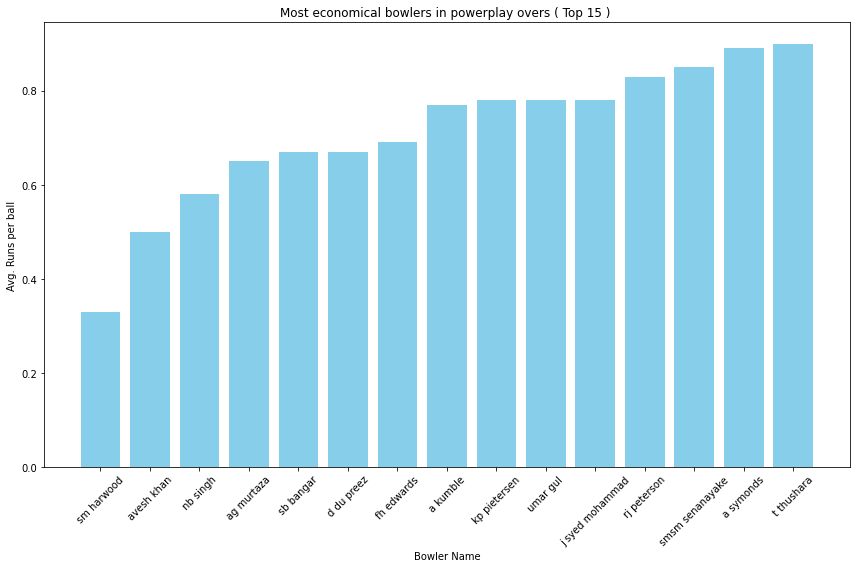

In [0]:
# assuming 'economiclal_bowlers_powerplay' is alredy executed and available as a spark dataframe
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

#visualizing using matplotlib 
plt.figure(figsize=(12, 8))
#limiting to top 10 for clarity on the plot 
top_economical_bowlers = economical_bowlers_pd.nsmallest(15, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Avg. Runs per ball')
plt.title('Most economical bowlers in powerplay overs ( Top 15 ) ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
import seaborn as sns

In [0]:
print(toss_impact_pd.head())
print(toss_impact_pd.columns)

   match_id                  toss_winner toss_name  \
0    335987  Royal Challengers Bangalore     field   
1    335988          Chennai Super Kings       bat   
2    335989             Rajasthan Royals       bat   
3    335990               Mumbai Indians       bat   
4    335991              Deccan Chargers       bat   

                   toss_winner match_outcome  
0  Royal Challengers Bangalore          Lost  
1          Chennai Super Kings           Won  
2             Rajasthan Royals          Lost  
3               Mumbai Indians          Lost  
4              Deccan Chargers          Lost  
Index(['match_id', 'toss_winner', 'toss_name', 'toss_winner', 'match_outcome'], dtype='object')


In [0]:
toss_impact_pd = toss_impact_pd.rename(columns={'toss_winner.1': 'match_outcome'})

# Check the DataFrame structure again
print(toss_impact_pd.head())
print(toss_impact_pd.columns)

   match_id                  toss_winner toss_name  \
0    335987  Royal Challengers Bangalore     field   
1    335988          Chennai Super Kings       bat   
2    335989             Rajasthan Royals       bat   
3    335990               Mumbai Indians       bat   
4    335991              Deccan Chargers       bat   

                   toss_winner match_outcome  
0  Royal Challengers Bangalore          Lost  
1          Chennai Super Kings           Won  
2             Rajasthan Royals          Lost  
3               Mumbai Indians          Lost  
4              Deccan Chargers          Lost  
Index(['match_id', 'toss_winner', 'toss_name', 'toss_winner', 'match_outcome'], dtype='object')


In [0]:
# Check for null values in the columns used for plotting
print(toss_impact_pd[['toss_winner', 'match_outcome']].isnull().sum())



toss_winner      1
toss_winner      1
match_outcome    0
dtype: int64


In [0]:
# toss_impact_pd = toss_match_impact_on_game.toPandas()
toss_impact_pd_cleaned = toss_impact_pd.dropna(subset=['toss_winner', 'match_outcome'])

#creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd_cleaned)
plt.title('Impact of Winning Toss on Match Outcome')
plt.xlabel('Toss winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 720x432 with 0 Axes>

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File <command-2741994483024992>:6
      4 #creating a countplot to show win/loss after winning toss
      5 plt.figure(figsize=(10, 6))
----> 6 sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd_cleaned)
      7 plt.title('Impact of Winning Toss on Match Outcome')
      8 plt.xlabel('Toss winner')

File /databricks/python/lib/python3.9/site-packages/seaborn/_decorators.py:46, in _deprecate_positional_args.<locals>.inner_f(*args, **kwargs)
     36     warnings.warn(
     37         "Pass the following variable{} as {}keyword arg{}: {}. "
     38         "From version 0.12, the only valid positional argument "
   (...)
     43         FutureWarning
     44     )
     45 kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})
---> 46 return f(**kwargs)

File /databricks/python/lib/python3.9/site-packages/seabor

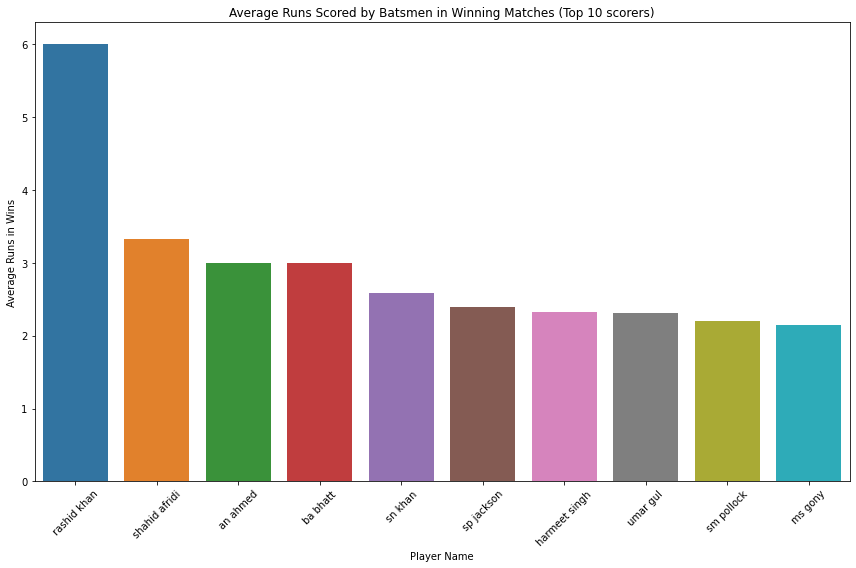

In [0]:
average_runs_pd = average_runs_in_wins.toPandas()

# using seaborn to plot average runs in winning matches
plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
scores_by_venue = spark.sql("""
    SELECT venue_name, avg(total_runs) AS average_score, max(total_runs) AS highest_score
    FROM (
        SELECT ball_by_ball.match_id, match.venue_name, sum(runs_scored) AS total_runs
        FROM ball_by_ball
        JOIN match ON ball_by_ball.match_id = match.match_id
        GROUP BY ball_by_ball.match_id, match.venue_name
    )  
    GROUP BY venue_name
    ORDER BY average_score DESC                  
""")

scores_by_venue.show()

+--------------------+------------------+-------------+
|          venue_name|     average_score|highest_score|
+--------------------+------------------+-------------+
|   Brabourne Stadium| 325.8181818181818|          399|
|Saurashtra Cricke...|             319.1|          393|
|Punjab Cricket As...|317.42857142857144|          341|
|    Barabati Stadium|311.57142857142856|          404|
|          Green Park|             308.0|          378|
|Maharashtra Crick...|302.06666666666666|          377|
|Rajiv Gandhi Inte...|             302.0|          365|
|Himachal Pradesh ...| 301.1111111111111|          371|
|MA Chidambaram St...| 299.7291666666667|          447|
|Sardar Patel Stad...|             298.0|          377|
|Punjab Cricket As...|296.77142857142854|          426|
|    Wankhede Stadium| 296.4736842105263|          419|
|Holkar Cricket St...|             296.2|          371|
|Punjab Cricket As...|             296.0|          380|
|M Chinnaswamy Sta...| 292.7878787878788|       

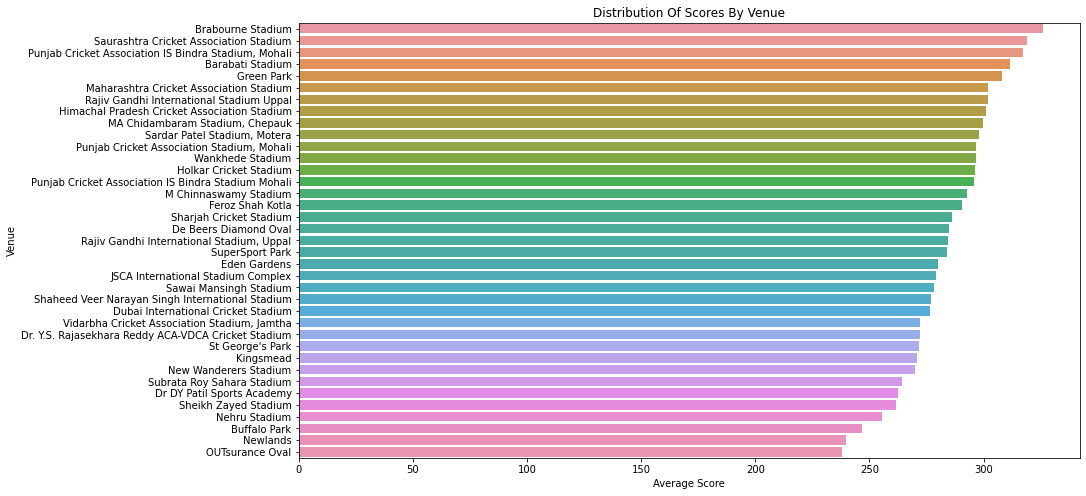

In [0]:
# plotting scores by venue 

scores_by_venue_pd = scores_by_venue.toPandas()

# plot 
plt.figure(figsize=(14, 8))
sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd)
plt.title('Distribution Of Scores By Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()


In [0]:
dismissal_types = spark.sql("""
    SELECT out_type, count(*) as frequency
    FROM ball_by_ball
    WHERE out_type IS NOT NULL
    GROUP BY out_type
    ORDER BY frequency DESC
    
                            """)

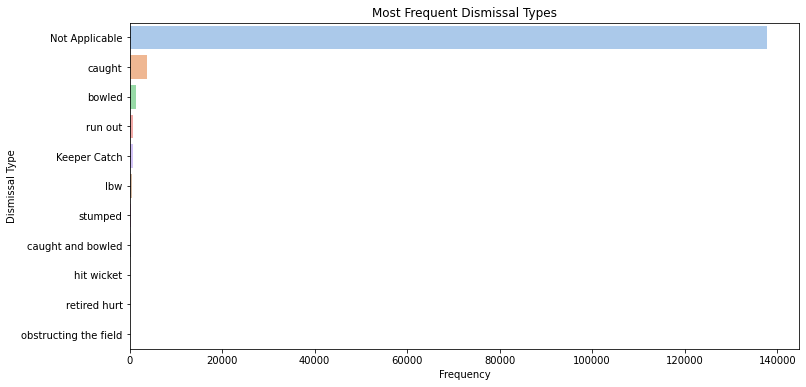

In [0]:
## plot now 

dismissal_types_pd = dismissal_types.toPandas()

plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='out_type', data=dismissal_types_pd, palette='pastel')
plt.title('Most Frequent Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()


In [0]:
team_toss_win_performance = spark.sql("""
SELECT team1, COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
FROM match
WHERE toss_winner = team1
GROUP BY team1
ORDER BY wins_after_toss DESC
""")


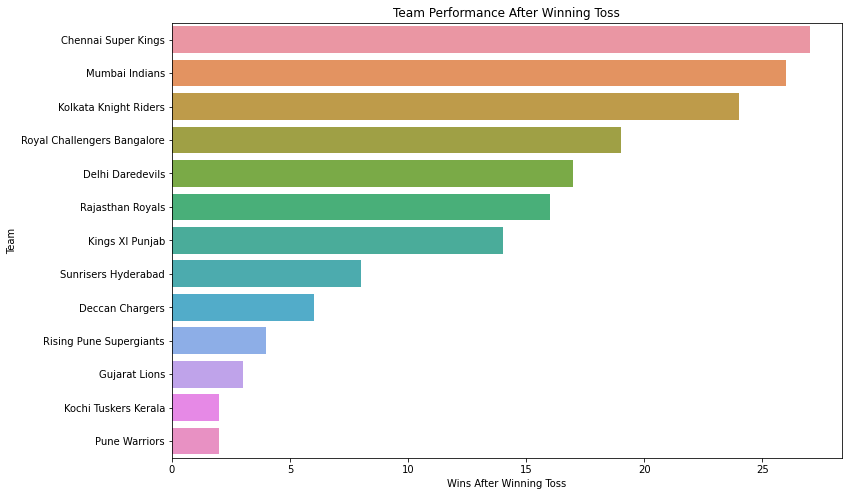

In [0]:
team_toss_win_pd = team_toss_win_performance.toPandas()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()
